# Sentiment Analysis

In [1]:
#importing pandas and numpy
import numpy as np
import pandas as pd

In [2]:
#importing training dataset 
df= pd.read_csv('sentiment_train.csv')

In [3]:
df.sample(4)

,Sentence,Polarity
1412,Jawbone Era is awesome too!,1
193,"I had a salad with the wings, and some ice cre...",1
1449,There's really nothing bad I can say about thi...,0
1963,I use this product in a motor control center w...,1


In [4]:
df.shape

(2400, 2)

In [5]:
#summary 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB


In [6]:
#check for missing values
df.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [7]:
#renaming the columns
df.rename(columns={'Sentence':'text','Polarity':'target'},inplace=True)

In [8]:
df.head()

,text,target
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [9]:
#check for duplicate values
df.duplicated().sum()

17

In [10]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [11]:
df.duplicated().sum()


0

In [12]:
df.shape

(2383, 2)

In [13]:
df.head()

,text,target
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [14]:
df['target'].value_counts()

0    1206
1    1177
Name: target, dtype: int64

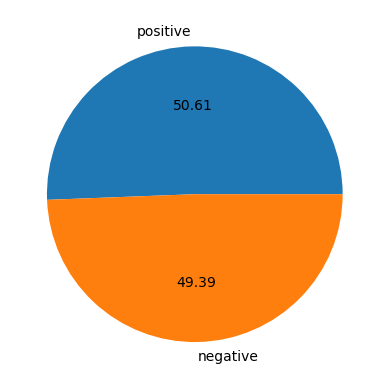

In [15]:
#importing matplotlib for visualization
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['positive','negative'], autopct="%0.2f")
plt.show()


In [16]:
# Data is balanced

In [17]:
!pip install nltk

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\A
[nltk_data]     SAMHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
# number of characters in text
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,text,target,num_characters
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [22]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,text,target,num_characters,num_words
0,Wow... Loved this place.,1,24,6
1,Crust is not good.,0,18,5
2,Not tasty and the texture was just nasty.,0,41,9
3,Stopped by during the late May bank holiday of...,1,87,16
4,The selection on the menu was great and so wer...,1,59,13


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2383.000000,2383.000000,2383.000000
mean,60.180025,12.889215,1.033571
std,37.970844,7.694873,0.182476
min,6.000000,1.000000,1.000000
25%,31.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,82.000000,17.000000,1.000000
max,336.000000,69.000000,3.000000


In [27]:
# positive reviews
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1177.000000,1177.000000,1177.000000
mean,58.792693,12.524214,1.033135
std,38.114036,7.702127,0.179065
min,6.000000,1.000000,1.000000
25%,30.000000,7.000000,1.000000
50%,50.000000,11.000000,1.000000
75%,80.000000,17.000000,1.000000
max,336.000000,69.000000,2.000000


In [28]:
# negative reviews
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1206.000000,1206.000000,1206.000000
mean,61.533997,13.245439,1.033997
std,37.797277,7.674247,0.185817
min,6.000000,2.000000,1.000000
25%,32.000000,7.000000,1.000000
50%,54.000000,12.000000,1.000000
75%,83.750000,18.000000,1.000000
max,270.000000,52.000000,3.000000


In [29]:
#importing seaborn for visualization
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

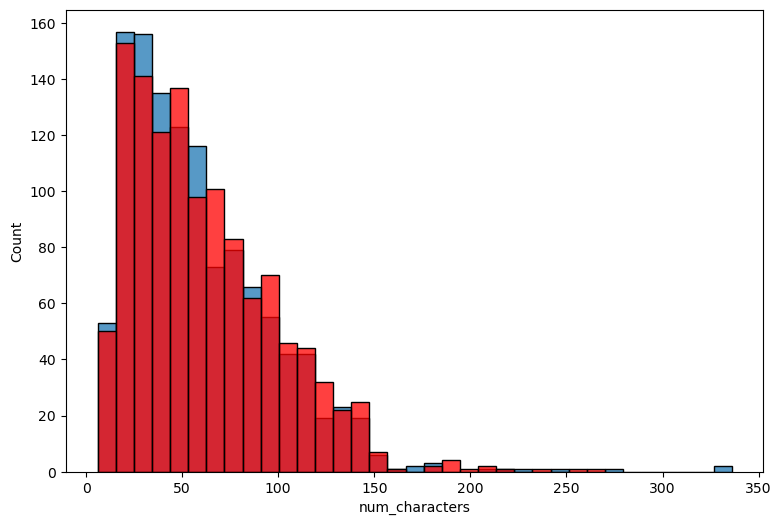

In [30]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target'] == 1]['num_characters'])
sns.histplot(df[df['target'] == 0]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

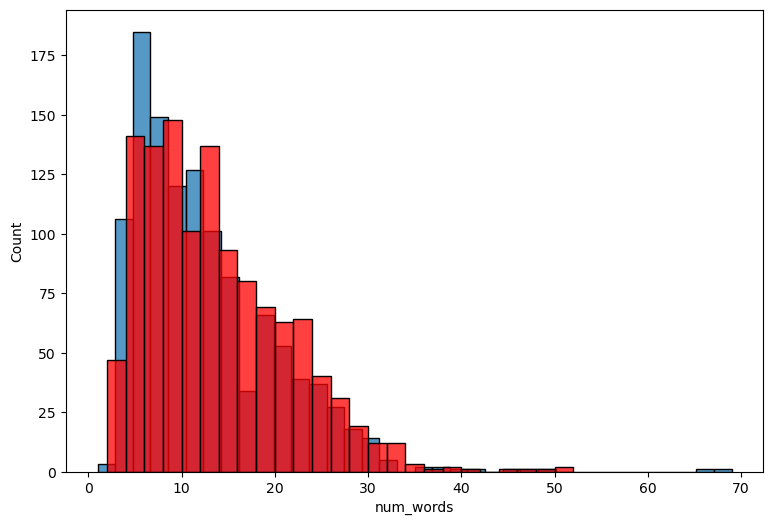

In [31]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['target'] == 1]['num_words'])
sns.histplot(df[df['target'] == 0]['num_words'],color='red')

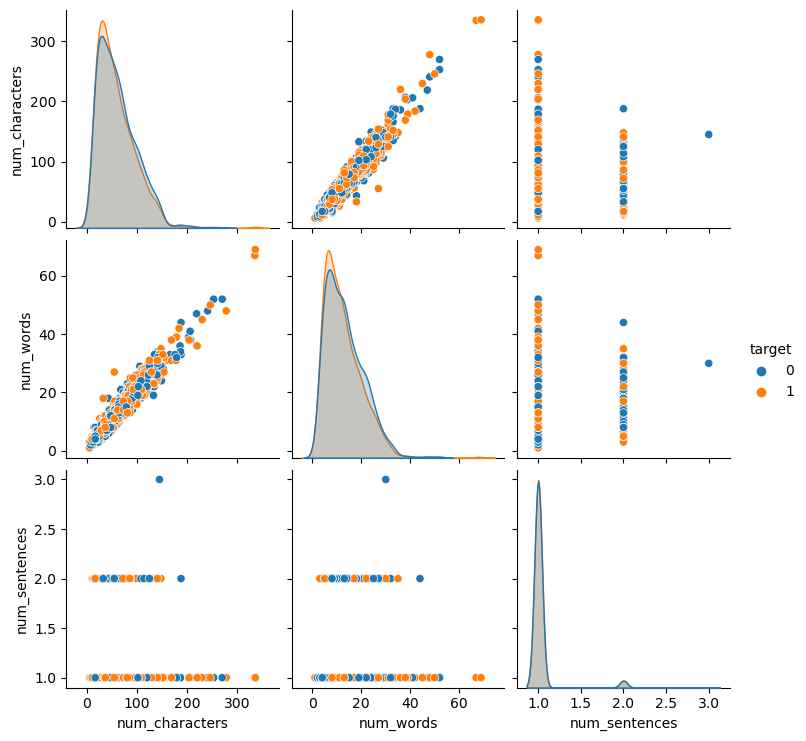

In [32]:
sns.pairplot(df,hue='target')

C:\Users\A SAMHITHA\AppData\Local\Temp\ipykernel_44640\3231597727.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

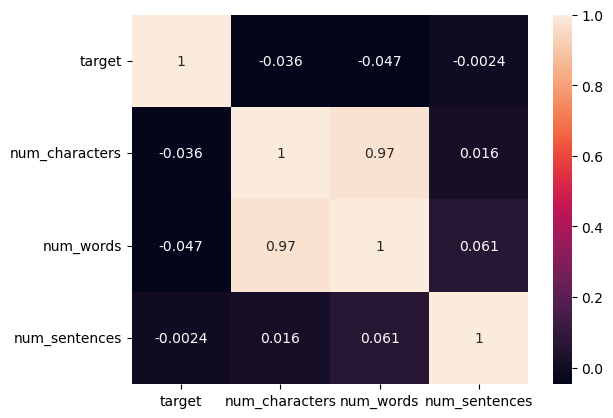

In [33]:
#feature correlation
sns.heatmap(df.corr(), annot=True)

In [34]:
# importing testing dataset
test= pd.read_csv('sentiment_test.csv')

In [35]:
test.sample(4)


,Sentence,Polarity
191,Which is precisely why I am giving it such a b...,0
144,"It's just adorable seeing Mickey playing ""Turk...",1
530,I rate this movie 9/10.,1
483,This film tries to be a serious and sophistica...,0


In [36]:
test.shape

(600, 2)

In [37]:
#summary test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [38]:
#check for missing values
test.isnull().sum()

Sentence    0
Polarity    0
dtype: int64

In [39]:
#renaming the columns
test.rename(columns={'Sentence':'text','Polarity':'target'},inplace=True)

In [40]:
test.head()

,text,target
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [41]:
#check for duplicate values
test.duplicated().sum()

1

In [42]:
#remove duplicates
test = test.drop_duplicates(keep='first')

In [43]:
test.duplicated().sum()

0

In [44]:
test.shape

(599, 2)

In [45]:
test.head()

,text,target
0,A good commentary of today's love and undoubte...,1
1,For people who are first timers in film making...,1
2,"It was very popular when I was in the cinema, ...",1
3,It's a feel-good film and that's how I felt wh...,1
4,It has northern humour and positive about the ...,1


In [46]:
test['target'].value_counts()

1    313
0    286
Name: target, dtype: int64

In [47]:
 #number of characters in text
test['num_characters'] = test['text'].apply(len)

In [48]:
test.head()

,text,target,num_characters
0,A good commentary of today's love and undoubte...,1,72
1,For people who are first timers in film making...,1,85
2,"It was very popular when I was in the cinema, ...",1,106
3,It's a feel-good film and that's how I felt wh...,1,76
4,It has northern humour and positive about the ...,1,72


In [49]:
# number of words
test['num_words'] = test['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [50]:
test.head()

,text,target,num_characters,num_words
0,A good commentary of today's love and undoubte...,1,72,14
1,For people who are first timers in film making...,1,85,19
2,"It was very popular when I was in the cinema, ...",1,106,23
3,It's a feel-good film and that's how I felt wh...,1,76,19
4,It has northern humour and positive about the ...,1,72,12


In [51]:
# num of sentence
test['num_sentences'] = test['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [52]:
test.head()

,text,target,num_characters,num_words,num_sentences
0,A good commentary of today's love and undoubte...,1,72,14,1
1,For people who are first timers in film making...,1,85,19,2
2,"It was very popular when I was in the cinema, ...",1,106,23,1
3,It's a feel-good film and that's how I felt wh...,1,76,19,1
4,It has northern humour and positive about the ...,1,72,12,1


In [54]:
#Data Preprocessing

In [56]:
import nltk

In [57]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\A
[nltk_data]     SAMHITHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [58]:
#import nltk for text processing
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [59]:
#import string
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [60]:
#import porterstemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('roaming')

'roam'

In [61]:
# function for text preprocessing 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [62]:
#testing the function
transform_text('Hi how are you Pranav?')

'hi pranav'

In [63]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,Wow... Loved this place.,1,24,6,2
1,Crust is not good.,0,18,5,1
2,Not tasty and the texture was just nasty.,0,41,9,1
3,Stopped by during the late May bank holiday of...,1,87,16,1
4,The selection on the menu was great and so wer...,1,59,13,1


In [64]:
# applying the text transformation to our training data
df['text'].apply(transform_text)

0                                          wow love place
1                                              crust good
2                                      tasti textur nasti
3       stop late may bank holiday rick steve recommen...
4                                 select menu great price
                              ...                        
2395                          almost song cover girl tune
2396        annoy thing girl way rita hayworth put pedest
2397    unfortun girl exampl hollywood use exploit wom...
2398    narrat thu mani flashback everi part articul q...
2399    good cinematographi also make monica bellucci ...
Name: text, Length: 2383, dtype: object

In [65]:
df['transform_text'] = df['text'].apply(transform_text)

In [66]:
df.head()

,text,target,num_characters,num_words,num_sentences,transform_text
0,Wow... Loved this place.,1,24,6,2,wow love place
1,Crust is not good.,0,18,5,1,crust good
2,Not tasty and the texture was just nasty.,0,41,9,1,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,16,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,13,1,select menu great price


In [67]:
# applying the text transformation to our testing data
test['transform_text'] = test['text'].apply(transform_text)

In [68]:
test.head()

,text,target,num_characters,num_words,num_sentences,transform_text
0,A good commentary of today's love and undoubte...,1,72,14,1,good commentari today love undoubtedli film wo...
1,For people who are first timers in film making...,1,85,19,2,peopl first timer film make think excel job
2,"It was very popular when I was in the cinema, ...",1,106,23,1,popular cinema good hous good reaction plenti ...
3,It's a feel-good film and that's how I felt wh...,1,76,19,1,film felt came cinema
4,It has northern humour and positive about the ...,1,72,12,1,northern humour posit commun repres


In [69]:
#Model Building

In [70]:
#text Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [71]:
X_train = cv.fit_transform(df['transform_text']).toarray()
X_test = cv.transform(test['transform_text']).toarray()

In [72]:
X_train.shape

(2383, 3005)

In [73]:
y_train=df['target'].values

In [74]:
y_train.shape

(2383,)

In [75]:
X_test.shape

(599, 3005)

In [76]:
y_test=test['target'].values

In [77]:
y_test.shape

(599,)

In [78]:
#Trying different Naive bayes nodels

In [79]:
#importing NB models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [80]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [81]:
# Gaussian NB model accuracy, precision, f1, roc_auc_score

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print('Accuracy ',accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(recall_score(y_test,y_pred1))
print(f1_score(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))

Accuracy  0.669449081803005
[[173 113]
 [ 85 228]]
0.6686217008797654
0.7284345047923323
0.6972477064220183
0.6666648048437187


In [82]:
# Multinomial NB model accuracy, precision, f1, roc_auc_score

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))
print(f1_score(y_test,y_pred2))
print(roc_auc_score(y_test,y_pred2))

0.7746243739565943
[[249  37]
 [ 98 215]]
0.8531746031746031
0.6869009584664537
0.7610619469026549
0.7787651645479122


In [83]:
# Bernoulli NB model accuracy, precision, f1, roc_auc_score

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))
print(f1_score(y_test,y_pred3))
print(roc_auc_score(y_test,y_pred3))

0.7629382303839732
[[250  36]
 [106 207]]
0.8518518518518519
0.6613418530351438
0.7446043165467626
0.767733863580509


In [84]:
#Using Random Forest Classifier

In [85]:
#importing randomforest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200,random_state=0)

In [86]:
rfc.fit(X_train, y_train)
y_pred4 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(recall_score(y_test,y_pred4))
print(f1_score(y_test,y_pred4))
print(roc_auc_score(y_test,y_pred4))

0.7562604340567612
[[231  55]
 [ 91 222]]
0.8014440433212996
0.7092651757188498
0.752542372881356
0.7584787417055788


In [87]:
#importing GridsearchCV
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [90]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [93]:
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [94]:
rfc1.fit(X_train, y_train)
y_pred5 = rfc1.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(recall_score(y_test,y_pred5))
print(f1_score(y_test,y_pred5))
print(roc_auc_score(y_test,y_pred5))

C:\Users\A SAMHITHA\anaconda3\New folder\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.6828046744574291
[[267  19]
 [171 142]]
0.8819875776397516
0.4536741214057508
0.5991561181434599
0.6936202774860921


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

In [96]:
#generating report for random forest
rfc_cv_score = cross_val_score(rfc, X_train, y_train, cv=10, scoring='roc_auc')

In [97]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred4))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred4))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[231  55]
 [ 91 222]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       286
           1       0.80      0.71      0.75       313

    accuracy                           0.76       599
   macro avg       0.76      0.76      0.76       599
weighted avg       0.76      0.76      0.76       599



=== All AUC Scores ===
[0.84934865 0.85754307 0.88734417 0.88188559 0.90773305 0.89636299
 0.85466102 0.8569259  0.79568411 0.83396906]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8621457620234585


In [2]:
# generating report after cross validation
#rfc1_cv_score = cross_val_score(rfc1, X_train, y_train, cv=10, scoring='roc_auc')

In [99]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred5))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred5))
print('\n')
print("=== All AUC Scores ===")
print(rfc1_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc1_cv_score.mean())

=== Confusion Matrix ===
[[267  19]
 [171 142]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.61      0.93      0.74       286
           1       0.88      0.45      0.60       313

    accuracy                           0.68       599
   macro avg       0.75      0.69      0.67       599
weighted avg       0.75      0.68      0.67       599



=== All AUC Scores ===
[0.85064435 0.89403278 0.87659336 0.86980932 0.88760593 0.90794492
 0.85218927 0.84753126 0.78455888 0.80479621]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8575706267067977
